# 菲克第一定律

菲克第一定律建立了**稳态环境下**，扩散通量(diffusive flux)与浓度的关系。稳态环境定义如下：

> In systems theory, a system or a process is in a **steady state** if the variables which define the behavior of the system or the process are unchanging in time. In continuous time, this means that for those properties *p* of the system, the partial derivative with respect to time is zero and remains so:

第一定律假设了物质通量(flux)从浓度高的地方运动到浓度低的地方，并且通量与浓度梯度大小成正比。在一维环境下，菲克第一定律通常被写成以下的摩尔形式。

$$J = -D\frac{d\varphi}{dx}$$

物理含义：扩散通量 = 物质的浓度**随距离的变化率***扩散系数

- $J$是扩散通量，单位时间单位面积通过物质的物质的量。单位是$m^{-2}s^{-1}$
- $D$是扩散系数，单位$m^2/s$
- $\varphi$，对于理想混合物，表示浓度，单位体积里的物质的量，单位$mol/m^3$
- $x$，表示位置，单位是$m$

$D$正比于扩散粒子速度的平方，并且也取决于温度。室温下稀释液体中离子的扩散系数通常是$(0.6-2)*10^{-9}m^2/s$，生物分子的扩散系数通常是$10^{-11}$到$10^{-10}m^2/s$之间。

在二维或以上维度的情况下，需要使用$\bigtriangledown$，那么第一定律写成

$J=-D\nabla \varphi$

- 注意，第一定律只适用于稳态扩散的场合，即浓度和扩散通量不随时间变化。大多数扩散过程都是在非稳态条件下进行的。
- 非稳态扩散的特点是：扩散过程中，扩散通量随时间和距离变化。此时要应用菲克第二定律。


In [103]:
import numpy as np
import matplotlib.pylab as plt

# diffusion coeffient
Diffusion = 5.0*10**-10

# cal gradient: [sin(x)]' = [cos(x)]
def gradient(f, x) :
    delta = 0.01
    return (f(x+delta)-f(x-delta))/(2.0*delta)

# cal flux at position x
# according to the fick's firt law
def flux(f, x) :
    return -1.0 * Diffusion * gradient(f, x)

# cal x range from -10.0m to 10.0m
# cal concentration, gradient and flux

# implemtn draw 2D function
def draw(f, x):
    y_concentration = [ f(xx) for xx in x]
    y_gradient = [gradient(f, xx) for xx in x]
    y_flux = [ flux(f, xx) for xx in x]

    fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=False);
    axs[0].plot(x, y_concentration, label="concentation")
    axs[1].plot(x, y_gradient, label="gradient")
    axs[2].plot(x, y_flux, label="flux")
    for x in axs:
        x.grid()
        x.legend()
    plt.show()

## 1. 对三角函数的浓度仿真
在 $[-3.0, 3.0]$ 的范围内仿真计算

浓度公式 $\varphi (x) = 1.0 + sin(x)$

梯度公式 $\frac{\delta \varphi (x)}{x} = \frac{\varphi(x + \Delta) - \varphi(x - \Delta)}{2* \Delta}$

其中 $\Delta = 0.01$

流量计算公式 $f = -D * \frac{\varphi (x)}{x}$ 

其中$D = 5*10^{-10}$

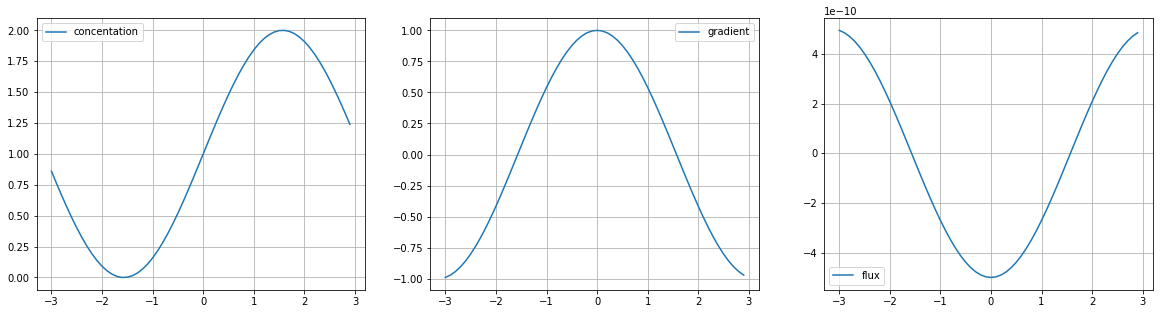

In [104]:
def f(x):
    return np.sin(x)+1.0
x = np.arange(-3.0, 3.0, 0.1)
draw(f, x)

#### 分析

* $x=0$，浓度的梯度最大，由于右侧浓度高于左侧，可以得知此处的流量最大，且方向向左(数值小于0)
* $x=\frac{\pi}{2}$，浓度最大，梯度为0，梯度为0意味着没有流量变化，可由图三观察符合预期

## 2. 对标准正态分布的浓度仿真

在 $[3.0, 3.0]$ 的范围内仿真计算

浓度公式 $\varphi (x) = $ 均值为0， 方差为1的高斯函数

梯度公式 $\frac{\delta \varphi (x)}{x} = \frac{\varphi(x + \Delta) - \varphi(x - \Delta)}{2* \Delta}$

其中 $\Delta = 0.01$

流量计算公式 $f = -D * \frac{\varphi (x)}{x}$ 

其中$D = 5*10^{-10}$

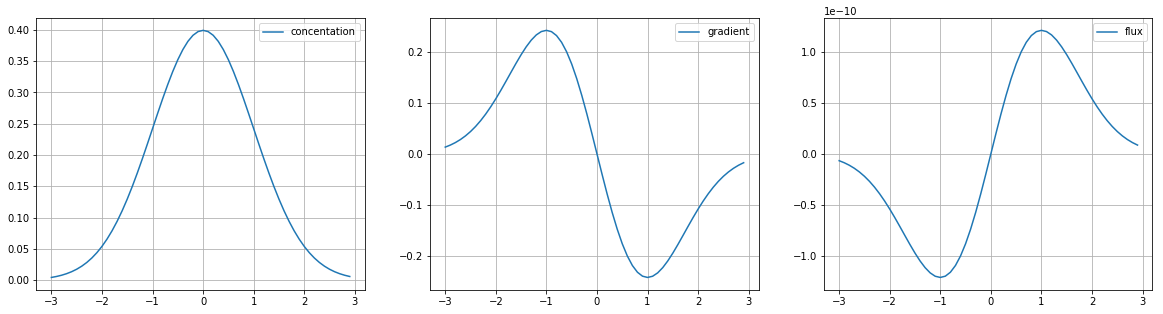

In [108]:
import math
def gaussian(x):
    sigma = 1
    u = 0
    y = np.exp(-(x - u) ** 2 / (2 * sigma ** 2)) / (sigma * math.sqrt(2 * math.pi))
    return y
x = np.arange(-3.0, 3.0, 0.1)
draw(gaussian, x)

注意

菲克第一定律只适用于稳态扩散，即浓度和扩散通量不随时间不变，大多数扩散并不满足这个条件

所以上述仿真只适用于“可视化”一下菲克第一定律，第一定律的应用场景非常有限

# 菲克第二定律
菲克第二定律由菲克第一定律和质量守恒定律得到

 $$\frac{\partial \varphi}{\partial t} + \frac{\partial}{\partial t}J = 0 $$

上述物理含义：浓度随时间变化的速率和通量随时间变化的速率，大小相等方向相反。浓度的变化，衡量的是在单位空间内，经单位时间，粒子的流出/流入情况。而这本来就是扩散通量的定义：单位时间单位面积通过的物质的量。

然后将$J$由菲克第一定律带入得到

 $$\frac{\partial \varphi}{\partial t} - \frac{\partial}{\partial x}(D\frac{\partial}{\partial x} \varphi)=0 $$

假设扩散系数是一个常数，改变微分顺序可以得到

 $$\frac{\partial}{\partial x}(D\frac{\partial}{\partial x} \varphi) = D\frac{\partial^2\varphi}{\partial x^2}$$

这样就得到了菲克第二定律，$$\frac{\partial \varphi}{\partial t} = D\frac{\partial^2\varphi}{\partial x^2}$$，或 $\frac{\partial \varphi}{\partial t}= D\Delta\varphi $

如果出现了$\varphi$处于稳定状态，也就是浓度不随时间改变，方程左边为0。在一维情况下，若扩散系数$D$为常数，那么浓度随着$x$轴是线性变化的，在二维或高维情况下，可以得到$$\bigtriangledown ^2 \varphi =0$$ 。（一阶导数为常数，二阶导数为0）

如果扩散系数$D$不是常数，而取决于物理位置和浓度，那么菲克第二定律写成

 $\frac{\partial \varphi}{\partial t} = \nabla \cdot (D\nabla \varphi) $